### 제1절. 단순 선형 회귀

#### 2. 정규방정식

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')

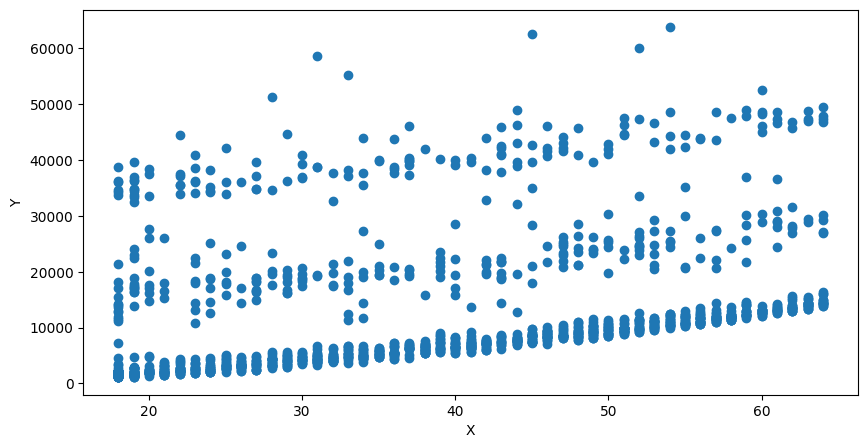

In [7]:
x = data['age']
y = data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
print(x.shape, y.shape)
x = np.array(x)
y = np.array(y)
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

(1338,) (1338,)


In [12]:
lr = LinearRegression()
lr.fit(x, y)
print("절편", lr.intercept_, "계수", lr.coef_)
print(lr.score(x, y))  # 결정계수

절편 [3165.88500606] 계수 [[257.72261867]]
0.08940589967885804


In [13]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]
[[ 8062.61476073]
 [19660.13260074]]


#### 3. 경사하강법
- 최적화알고리즘

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [16]:
y.ravel().shape

(1338,)

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=200)
sgd_reg.fit(x, y.ravel())  # y.ravel : 다차원 -> 1차원으로 바꿔주는 함수, flatten과 비슷함